<a href="https://colab.research.google.com/github/maisiejacinda/datamining/blob/main/Repo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import pandas as pd

# Langsung baca file dari direktori Colab
# Pastikan nama file ini sama persis dengan yang kamu upload sebelumnya
df = pd.read_csv("hoax_dataset_with_text.csv")
df_valid = pd.read_csv("kompas_dataset_with_text.csv")

print("Data hoax berhasil dimuat:")
print(df.head())

print("\nData valid (kompas) berhasil dimuat:")
print(df_valid.head())

Data hoax berhasil dimuat:
                                               judul  \
0  [SALAH] Salam 3 Jari dari Anies Bentuk Dukunga...   
1  [SALAH] Prabowo Ancam Penghujat Pemimpin akan ...   
2  [SALAH] Menkes Budi Sebut Lockdown Pandemi Sel...   
3  [SALAH] Prabowo Bilang “Setujukah Rakyat kalau...   
4  [SALAH] Cagub Jakarta Pramono Anung dan Ketua ...   

                                                link           tanggal  \
0  https://turnbackhoax.id/2024/10/30/salah-salam...  Oktober 30, 2024   
1  https://turnbackhoax.id/2024/10/30/salah-prabo...  Oktober 30, 2024   
2  https://turnbackhoax.id/2024/10/30/salah-menke...  Oktober 30, 2024   
3  https://turnbackhoax.id/2024/10/30/salah-prabo...  Oktober 30, 2024   
4  https://turnbackhoax.id/2024/10/30/salah-cagub...  Oktober 30, 2024   

                                           deskripsi  \
0  Faktanya, belum ada dukungan resmi Anies untuk...   
1  Tidak ada sumber valid yang membenarkan Presid...   
2  Tidak ada pernyataan

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("hoax_dataset_with_text.csv")

In [6]:
df.head()

,judul,link,tanggal,deskripsi,teks
0,[SALAH] Salam 3 Jari dari Anies Bentuk Dukunga...,https://turnbackhoax.id/2024/10/30/salah-salam...,"Oktober 30, 2024","Faktanya, belum ada dukungan resmi Anies untuk...",Terjadi kesalahan: 502
1,[SALAH] Prabowo Ancam Penghujat Pemimpin akan ...,https://turnbackhoax.id/2024/10/30/salah-prabo...,"Oktober 30, 2024",Tidak ada sumber valid yang membenarkan Presid...,Tidak ada sumber valid yang membenarkan Presid...
2,[SALAH] Menkes Budi Sebut Lockdown Pandemi Sel...,https://turnbackhoax.id/2024/10/30/salah-menke...,"Oktober 30, 2024",Tidak ada pernyataan Menkes Budi tentang lockd...,Tidak ada pernyataan Menkes Budi tentang lockd...
3,[SALAH] Prabowo Bilang “Setujukah Rakyat kalau...,https://turnbackhoax.id/2024/10/30/salah-prabo...,"Oktober 30, 2024",Hasil pencarian di Google mengarah ke pemberit...,Hasil pencarian di Google mengarah ke pemberit...
4,[SALAH] Cagub Jakarta Pramono Anung dan Ketua ...,https://turnbackhoax.id/2024/10/30/salah-cagub...,"Oktober 30, 2024",KPK menjelaskan belum ada bukti yang kuat meng...,KPK menjelaskan belum ada bukti yang kuat meng...


In [7]:
print(df.columns)


Index(['judul', 'link', 'tanggal', 'deskripsi', 'teks'], dtype='object')


In [8]:
def extract_label(judul):
    if judul.startswith("[SALAH]"):
        return "hoax"
    else:
        return "valid"

df['label'] = df['judul'].apply(extract_label)


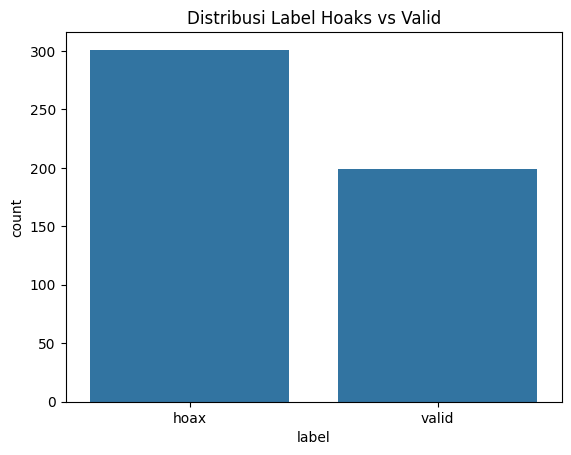

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Distribusi Label Hoaks vs Valid")
plt.show()


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   judul      500 non-null    object
 1   link       500 non-null    object
 2   tanggal    500 non-null    object
 3   deskripsi  500 non-null    object
 4   teks       500 non-null    object
 5   label      500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [11]:
print(df.columns)


Index(['judul', 'link', 'tanggal', 'deskripsi', 'teks', 'label'], dtype='object')


STEP TOKENISASI IndoBERT + PROCESSING

In [12]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Hapus URL
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Hapus simbol
    text = text.lower()  # Huruf kecil semua
    return text

df['teks'] = df['teks'].astype(str).apply(clean_text)


In [13]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

In [14]:
df['teks'] = df['teks'].astype(str)

tokenized = tokenizer(
    list(df['teks']),
    padding='max_length',
    truncation=True,
    max_length=128,
    return_tensors='pt'
)


In [15]:
df['teks'] = df['teks'].astype(str)

In [16]:
tokenized = tokenizer(
    list(df['teks']),
    padding='max_length',
    truncation=True,
    max_length=128,
    return_tensors='pt'
)

STEP LABEL ENCODING + TRAIN-TEST SPLIT

In [17]:
from sklearn.model_selection import train_test_split
import torch

In [18]:
df['label'] = df['label'].map({'hoax': 1, 'valid': 0})

In [19]:
input_ids = tokenized['input_ids']
attention_mask = tokenized['attention_mask']
labels = torch.tensor(df['label'].values)

In [20]:
X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids,
    attention_mask,
    labels,
    test_size=0.2,
    stratify=labels,
    random_state=42
)

penjelasan

input_ids = hasil konversi kata ke token angka dari IndoBERT.

attention_mask = penanda token mana yang valid dan mana yang padding (0).

y_train dan y_test = label target untuk training dan evaluasi.

**STEP DEFINISI MODEL IndoBERT + CNN-LSTM**

In [21]:
import torch
import torch.nn as nn
from transformers import BertModel

In [22]:
class IndoBERT_CNN_LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = BertModel.from_pretrained('indobenchmark/indobert-base-p1')
        self.conv1 = nn.Conv1d(in_channels=768, out_channels=128, kernel_size=3, padding=1)
        self.lstm = nn.LSTM(input_size=128, hidden_size=64, batch_first=True)
        self.fc = nn.Linear(64, 2)  # 2 kelas: valid & hoax

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        x = outputs.last_hidden_state  # shape: (batch_size, seq_len, 768)

        x = x.permute(0, 2, 1)  # untuk Conv1d: (batch, channels, seq)
        x = self.conv1(x)
        x = x.permute(0, 2, 1)  # kembalikan ke (batch, seq_len, channels)

        lstm_out, _ = self.lstm(x)  # output: (batch, seq_len, hidden_size)
        x = torch.mean(lstm_out, dim=1)  # Mean Pooling → ambil rata-rata semua token
        logits = self.fc(x)
        return logits


STEP TRAINING LOOP + EVALUASI

In [23]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix
train_dataset = TensorDataset(X_train_ids, X_train_mask, y_train)
test_dataset = TensorDataset(X_test_ids, X_test_mask, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = IndoBERT_CNN_LSTM().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

for epoch in range(10):
    model.train()
    total_loss = 0

    for batch in train_loader:  # ← HARUSNYA DI SINI
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {total_loss / len(train_loader):.4f}")


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Epoch 1 - Loss: 0.5350
Epoch 2 - Loss: 0.2393
Epoch 3 - Loss: 0.1539
Epoch 4 - Loss: 0.0900
Epoch 5 - Loss: 0.0621
Epoch 6 - Loss: 0.0448
Epoch 7 - Loss: 0.0389
Epoch 8 - Loss: 0.0442
Epoch 9 - Loss: 0.0274
Epoch 10 - Loss: 0.0244


In [24]:
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_labels = []
all_confs = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask)

        probs = torch.softmax(outputs, dim=1)
        preds = torch.argmax(probs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_confs.extend(probs.max(dim=1).values.cpu().numpy())

print("Evaluasi model pada data test:")
print(classification_report(all_labels, all_preds, target_names=["valid", "hoax"]))


Evaluasi model pada data test:
              precision    recall  f1-score   support

       valid       0.93      0.93      0.93        40
        hoax       0.95      0.95      0.95        60

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



STEP EVALUASI MODEL

In [25]:
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        outputs = model(input_ids, attention_mask)
        preds = torch.argmax(outputs, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["valid", "hoax"]))

print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))

Classification Report:

              precision    recall  f1-score   support

       valid       0.93      0.93      0.93        40
        hoax       0.95      0.95      0.95        60

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

Confusion Matrix:

[[37  3]
 [ 3 57]]


In [26]:
df_hoax = df

In [27]:
df_valid['label'] = 'valid'
df_hoax['label'] = 'hoax'

In [28]:
df_valid = df_valid[['teks', 'label']].dropna()
df_hoax = df_hoax[['teks', 'label']].dropna()

In [29]:
df_final = pd.concat([df_valid, df_hoax]).sample(frac=1, random_state=42).reset_index(drop=True)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


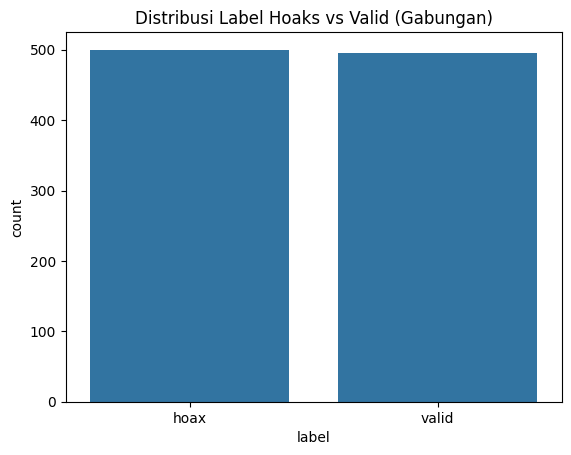

In [31]:
sns.countplot(data=df_final, x='label')
plt.title("Distribusi Label Hoaks vs Valid (Gabungan)")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_final['label_enc'] = le.fit_transform(df_final['label'])
X_train, X_test, y_train, y_test = train_test_split(
    df_final['teks'], df_final['label_enc'],
    test_size=0.2, random_state=42, stratify=df_final['label_enc']
)

In [34]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
def tokenize_batch(texts):
    return tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors='pt'
    )

train_encodings = tokenize_batch(X_train)
test_encodings = tokenize_batch(X_test)
import torch
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)
X_train_ids = train_encodings['input_ids']
X_train_mask = train_encodings['attention_mask']
X_test_ids = test_encodings['input_ids']
X_test_mask = test_encodings['attention_mask']

In [35]:
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train_ids, X_train_mask, y_train)
test_dataset = TensorDataset(X_test_ids, X_test_mask, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [36]:
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = IndoBERT_CNN_LSTM().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

In [37]:
from sklearn.metrics import accuracy_score

num_epochs = 5  # ganti sesuai kebutuhan, misalnya 5 atau 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {total_loss / len(train_loader):.4f} - Accuracy: {acc:.4f}")


Epoch 1/5 - Loss: 0.1387 - Accuracy: 0.9686
Epoch 2/5 - Loss: 0.0195 - Accuracy: 1.0000
Epoch 3/5 - Loss: 0.0121 - Accuracy: 1.0000
Epoch 4/5 - Loss: 0.0089 - Accuracy: 1.0000
Epoch 5/5 - Loss: 0.0071 - Accuracy: 1.0000


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask)
        preds = torch.argmax(outputs, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["valid", "hoax"]))

print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))

Classification Report:

              precision    recall  f1-score   support

       valid       1.00      0.99      0.99       100
        hoax       0.99      1.00      0.99        99

    accuracy                           0.99       199
   macro avg       0.99      0.99      0.99       199
weighted avg       1.00      0.99      0.99       199

Confusion Matrix:

[[99  1]
 [ 0 99]]


**Analisis Statistik**

In [39]:
df_final['panjang_karakter'] = df_final['teks'].apply(len)
df_final['jumlah_kata'] = df_final['teks'].apply(lambda x: len(str(x).split()))
print(df_final[['panjang_karakter', 'jumlah_kata']].describe())

       panjang_karakter  jumlah_kata
count        995.000000   995.000000
mean        2093.281407   270.926633
std          674.492804    87.978548
min           21.000000     3.000000
25%         1573.000000   203.500000
50%         2055.000000   264.000000
75%         2528.500000   329.000000
max         4689.000000   645.000000


**Visualisasi Pendukung**

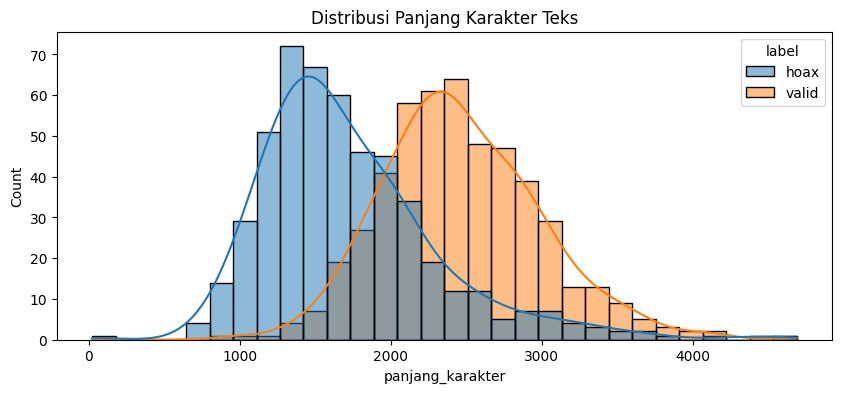

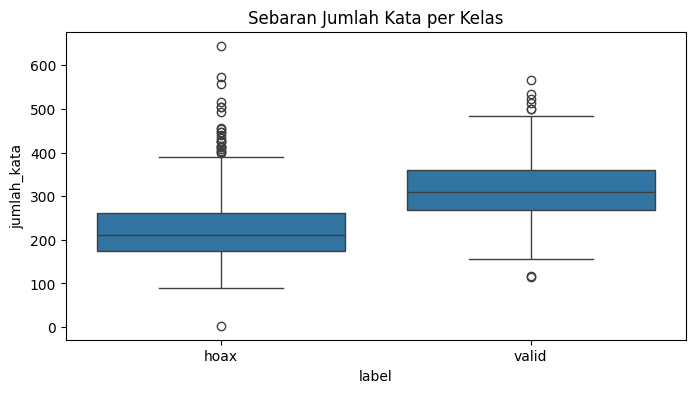

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.histplot(data=df_final, x='panjang_karakter', hue='label', kde=True, bins=30)
plt.title("Distribusi Panjang Karakter Teks")
plt.show()
plt.figure(figsize=(8,4))
sns.boxplot(data=df_final, x='label', y='jumlah_kata')
plt.title("Sebaran Jumlah Kata per Kelas")
plt.show()

In [41]:
df_hoax['label'] = 'hoax'
df_valid['label'] = 'valid'

df_hoax = df_hoax[['teks', 'label']]
df_valid = df_valid[['teks', 'label']]
df = pd.concat([df_hoax, df_valid]).sample(frac=1, random_state=42).reset_index(drop=True)
df['label_enc'] = df['label'].map({'valid': 0, 'hoax': 1})

CLEANING TEXT


In [42]:
import re

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r"http\S+|www.\S+", '', text)  # hapus URL
    text = re.sub(r"\d+", '', text)  # hapus angka
    text = re.sub(r"[^\w\s]", '', text)  # hapus tanda baca
    text = re.sub(r"\s+", ' ', text).strip()  # hapus spasi ganda
    return text

# Terapkan ke kolom teks
df['teks_clean'] = df['teks'].apply(clean_text)

# Cek hasil
df[['teks', 'teks_clean']].head()


,teks,teks_clean
0,"JAKARTA, KOMPAS.com- Ketua Badan Pengawas Pemi...",jakarta kompascom ketua badan pengawas pemilu ...
1,"JAKARTA, KOMPAS.com- Menteri Agraria dan Tata ...",jakarta kompascom menteri agraria dan tata rua...
2,"JAKARTA, KOMPAS.com- Kepala Staf Kepresidenan ...",jakarta kompascom kepala staf kepresidenan ksp...
3,"TANGERANG, KOMPAS.com- Polisi mendalami kasusp...",tangerang kompascom polisi mendalami kasuspeny...
4,"JAKARTA, KOMPAS.com- Presiden Human Initiative...",jakarta kompascom presiden human initiative to...


In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

# Contoh pakai TF-IDF buat vektor teks
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['teks_clean'])
y = df['label_enc']

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Cek distribusi baru
from collections import Counter
print(Counter(y_resampled))


Counter({0: 500, 1: 500})


In [44]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   teks        995 non-null    object
 1   label       995 non-null    object
 2   label_enc   995 non-null    int64 
 3   teks_clean  995 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.2+ KB


,0
teks,0
label,0
label_enc,0
teks_clean,0


In [45]:
df['label'].value_counts()
df['label'].value_counts(normalize=True) * 100

,proportion
label,
hoax,50.251256
valid,49.748744


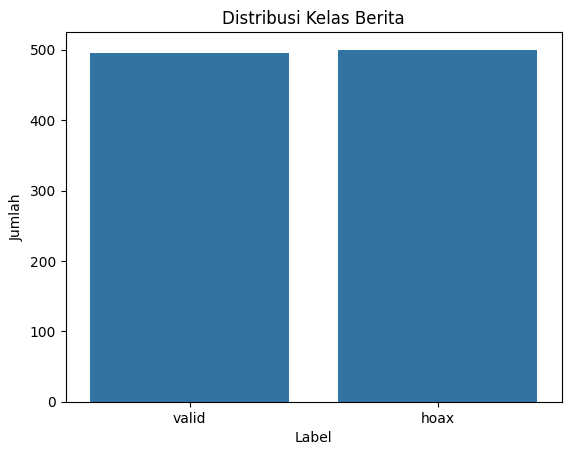

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Distribusi Kelas Berita")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

In [47]:
df['panjang_karakter'] = df['teks'].apply(len)
df['jumlah_kata'] = df['teks'].apply(lambda x: len(str(x).split()))
df[['panjang_karakter', 'jumlah_kata']].describe()

,panjang_karakter,jumlah_kata
count,995.000000,995.000000
mean,2093.281407,270.926633
std,674.492804,87.978548
min,21.000000,3.000000
25%,1573.000000,203.500000
50%,2055.000000,264.000000
75%,2528.500000,329.000000
max,4689.000000,645.000000


In [48]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

# Tokenisasi teks
tokenized = tokenizer(
    list(df['teks']),
    padding='max_length',
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])  # hoax → 1, valid → 0

In [50]:
class IndoBERT_CNN_LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = BertModel.from_pretrained('indobenchmark/indobert-base-p1')
        self.conv1 = nn.Conv1d(768, 128, kernel_size=3, padding=1)
        self.lstm = nn.LSTM(128, 64, batch_first=True)
        self.fc = nn.Linear(64, 2)

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():  # IndoBERT digunakan sebagai feature extractor
            outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        x = outputs.last_hidden_state
        x = x.permute(0, 2, 1)  # CNN butuh format (batch, channels, seq)
        x = self.conv1(x)
        x = x.permute(0, 2, 1)  # LSTM butuh (batch, seq, channels)
        _, (h_n, _) = self.lstm(x)
        logits = self.fc(h_n.squeeze(0))
        return logits

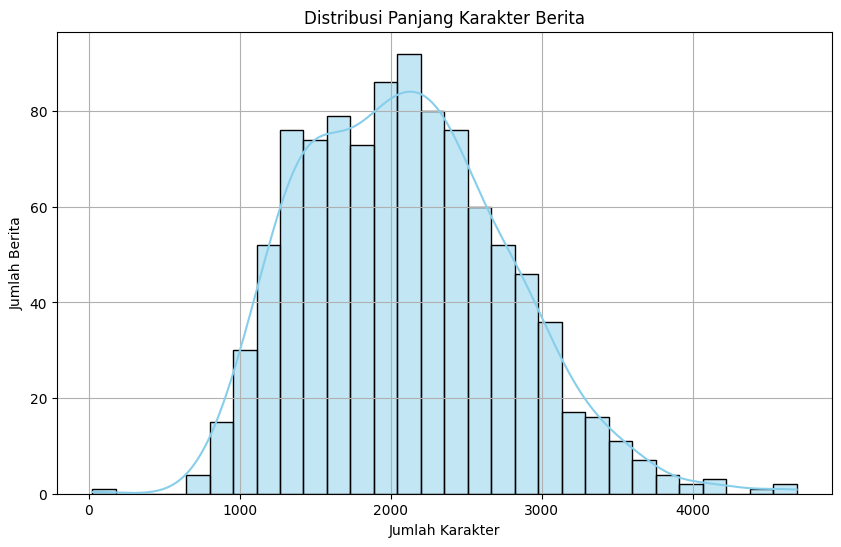

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['panjang_karakter'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Panjang Karakter Berita")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Jumlah Berita")
plt.grid(True)
plt.show()


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

# TF-IDF vektorisasi teks
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['teks_clean'])  # gunakan teks hasil cleaning
y = df['label_enc']

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

print("Distribusi label setelah SMOTE:", Counter(y_resampled))

# atau bisa coba ADASYN:
# adasyn = ADASYN(random_state=42)
# X_resampled, y_resampled = adasyn.fit_resample(X_tfidf, y)


Distribusi label setelah SMOTE: Counter({1: 500, 0: 500})


In [53]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

# Tokenisasi teks
tokenized = tokenizer(
    list(df['teks']),
    padding='max_length',
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

# Hasil embedding dalam bentuk input_ids dan attention_mask
X_train_ids = train_encodings['input_ids']
X_train_mask = train_encodings['attention_mask']
X_test_ids = test_encodings['input_ids']
X_test_mask = test_encodings['attention_mask']

In [54]:
torch.save(model.state_dict(), "model_hoax.pt")
tokenizer.save_pretrained("tokenizer_hoax")


('tokenizer_hoax/tokenizer_config.json',
 'tokenizer_hoax/special_tokens_map.json',
 'tokenizer_hoax/vocab.txt',
 'tokenizer_hoax/added_tokens.json')

In [55]:
from google.colab import files
files.download("model_hoax.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>